In [19]:
# MNIST 
# Data Loader , Transforamtion
# Multilayer Neural Net , activation Function
# Loss and Optimizer
# Training Loop (Batch Training)
# Model Evaluation
# GPU Support

In [20]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [21]:
# device config

device = torch.device('cpu')

# hyper parameters

input_size = 784              #  image size 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [22]:
# MNIST Data set
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True, 
                                           transform = transforms.ToTensor(), 
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = False, 
                                           transform = transforms.ToTensor())

In [23]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader  = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size , shuffle = False)

In [24]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


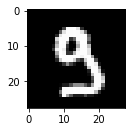

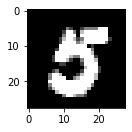

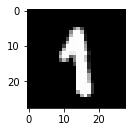

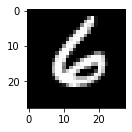

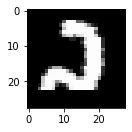

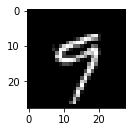

In [25]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
    plt.show()

In [26]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)     # no activation after this as we use cross entropy
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [27]:
# loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = learning_rate)

In [28]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape images to 100 * 784 from 100 * 1 * 28 * 28
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
    
        # update weights
        optimizer.step()
        
        if (i+1)%100 == 0 :
            print(f'epoch {epoch + 1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item() :.4f}')  

epoch 1 / 2, step 100 / 600, loss = 0.4918
epoch 1 / 2, step 200 / 600, loss = 0.2314
epoch 1 / 2, step 300 / 600, loss = 0.2702
epoch 1 / 2, step 400 / 600, loss = 0.2805
epoch 1 / 2, step 500 / 600, loss = 0.3055
epoch 1 / 2, step 600 / 600, loss = 0.1425
epoch 2 / 2, step 100 / 600, loss = 0.2580
epoch 2 / 2, step 200 / 600, loss = 0.2990
epoch 2 / 2, step 300 / 600, loss = 0.3016
epoch 2 / 2, step 400 / 600, loss = 0.0862
epoch 2 / 2, step 500 / 600, loss = 0.1092
epoch 2 / 2, step 600 / 600, loss = 0.2144


In [29]:
# test

with torch.no_grad():
    n_correct = 0 
    n_samples = 0
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # RETURNS VALUE , INDEX
        _, predictions = torch.max(outputs , 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f' accuracy = {acc}')

 accuracy = 95.14
